CPH 03/09/2022

# MOCCA data analysis on custom data

MOCCA is a tool for the analysis of *High-Performance Liquid Chromatography–Diode Array Detection* (HPLC–DAD) datasets which are recorded in the context of reaction (process) controls. It only uses HPLC–DAD raw data and some basic user input for the data analysis.

## Case study background

This case study investigates the data processing of custom data, i.e., data which is given by the user via the Python environment rather than by a path to a file. This can be helpful for, e.g., the analysis of simulated HPLC–DAD data.

## Imports

In [1]:
# folders handling
import os
from glob import glob
import numpy as np

# user interaction
from mocca.user_interaction.campaign import HplcDadCampaign
from mocca.user_interaction.user_objects import Gradient
from mocca.user_interaction.user_objects import Compound
from mocca.user_interaction.user_objects import CustomData
from mocca.user_interaction.user_objects import HplcInput
from mocca.user_interaction.settings import Settings

# reporting
from mocca.report.hplc_input import report_hplc_input
from mocca.report.gradient import report_gradients
from mocca.report.chroms import report_chroms
from mocca.report.results import report_runs
from mocca.report.parafac import report_parafac
from mocca.report.peaks import report_peaks
from mocca.report.quali_comps import report_quali_comps
from mocca.report.quant_comps import report_quant_comps

# customized data analysis
import datetime
import time

%load_ext autoreload
%autoreload 2

## Custom data generation

We generated some random synthetic data of pure compounds using UV-Vis spectra and retention profiles from other camapigns. These data are found here:

In [2]:
# get path of this notebook
ipynb_path = os.path.dirname(os.path.realpath("__file__"))

# add the path to the test data folder
custom_data_path = os.path.join(ipynb_path, "custom_data")

In [3]:
with open(os.path.join(custom_data_path, "ret_1.txt"), "r") as file:
    ret_1 = [float(line.rstrip()) for line in file]
with open(os.path.join(custom_data_path, "ret_2.txt"), "r") as file:
    ret_2 = [float(line.rstrip()) for line in file]
with open(os.path.join(custom_data_path, "spec_1.txt"), "r") as file:
    spec_1 = [float(line.rstrip()) for line in file]
with open(os.path.join(custom_data_path, "spec_2.txt"), "r") as file:
    spec_2 = [float(line.rstrip()) for line in file]

Using these retention profiles and spectra, we create two datasets of pure compounds as well as a dataset of overlapping compounds.

In [4]:
data_1 = np.asarray(spec_1).reshape(len(spec_1), 1) * np.asarray(ret_1) / 10**6
data_2 = np.asarray(spec_2).reshape(len(spec_2), 1) * np.asarray(ret_2) / 10**6
data_comb = data_1 + data_2

Visualization of the synthetic data.

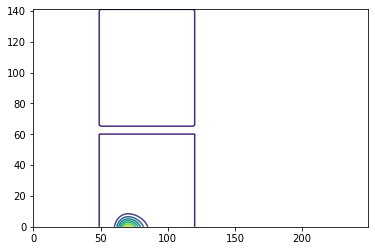

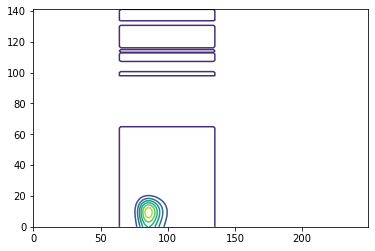

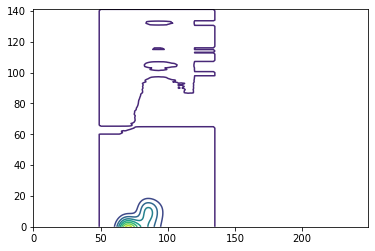

In [5]:
import matplotlib.pyplot as plt 
plt.contour(data_1)
plt.show()
plt.contour(data_2)
plt.show()
plt.contour(data_comb)
plt.show()

## Campaign initialization

In [6]:
custom_campaign = HplcDadCampaign()

### User input for calibration runs

We create HplcInput objects for each calibration run and add it to the campaign

In [7]:
path = 'some_identifier'
compound = Compound('comp_1', conc=1)
custom_data = CustomData(data_1, list(range(len(ret_1))), list(range(len(spec_1))))
exp = HplcInput(path, None, compound=compound, custom_data=custom_data)
custom_campaign.add_hplc_input(exp)

path = 'an_identifier'
compound = Compound('comp_2', conc=1)
custom_data = CustomData(data_2, list(range(len(ret_2))), list(range(len(spec_2))))
exp = HplcInput(path, None, compound=compound, custom_data=custom_data)
custom_campaign.add_hplc_input(exp)

### User input for reaction runs

In [8]:
path = 'another_identifier'
custom_data = CustomData(data_comb, list(range(len(ret_1))), list(range(len(spec_1))))
exp = HplcInput(path, None, custom_data=custom_data)
custom_campaign.add_hplc_input(exp)

### Settings for data processing

In [9]:
settings = Settings('custom',
                    absorbance_threshold = 1,
                    spectrum_correl_thresh=0.99, relative_distance_thresh=0.02)

### Data processing

In [10]:
%%time
custom_campaign.process_all_hplc_input(settings)

/Users/haascp/opt/anaconda3/envs/mocca-dev/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/haascp/opt/anaconda3/envs/mocca-dev/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


CPU times: user 22.4 s, sys: 2.2 s, total: 24.6 s
Wall time: 1.98 s


## Reporting

In [11]:
# get path of this notebook
custom_report_path = os.path.join(ipynb_path, "custom_reports")

In [12]:
report_hplc_input(custom_campaign.hplc_runs, custom_report_path)
report_gradients(custom_campaign.hplc_runs, custom_report_path)
report_chroms(custom_campaign.chroms, custom_campaign.settings, custom_report_path)
report_runs(custom_campaign.chroms, custom_campaign.quali_comp_db, custom_campaign.quant_comp_db, custom_report_path)
report_parafac(custom_campaign.chroms, custom_report_path)
report_peaks(custom_campaign.peak_db, custom_report_path)
report_quali_comps(custom_campaign.quali_comp_db, custom_report_path)
report_quant_comps(custom_campaign.quant_comp_db, custom_report_path)

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_hplc_input.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_chroms.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_runs.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_parafac.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_peak_db.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_quali_comp_db.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

Report saved to .//Users/haascp/Documents/GitHub/mocca/notebooks/custom_reports/report_quant_comp_db.html. To upload and share your report, create a free Datapane account by running `!datapane signup`.

## Customized data analysis by the user

This data analysis tool cannot include all possible data analysis needs of potential users. Therefore, we expect the user to do customized data analysis independently from the tool.

We give an example here, how to check if PARAFAC was able to resolve the impure peak correctly. We gave the tool pure compound runs with a concentration of 1 for each component. We therefore expect the resulting concentrations of the overlapping peak to be 1 each.

Let's have a look in the processed peaks. We see the "parent" impure peak (idx == 1) and the two resulting PARAFAC peaks (idx == -1).

In [13]:
custom_campaign.chroms[-1].peaks

[ProcessedPeak(left=53, right=133, maximum=71, offset=0, dataset=<class 'mocca.dad_data.models.ParafacData'>, idx=-1, saturation=False, pure=True, integral=150.6685349023538, istd=[], compound_id='comp_1', concentration=0.9696543690458158, is_compound=False),
 ProcessedPeak(left=53, right=133, maximum=85, offset=0, dataset=<class 'mocca.dad_data.models.CompoundData'>, idx=1, saturation=False, pure=False, integral=346.53978193013035, istd=[], compound_id=None, concentration=None, is_compound=False),
 ProcessedPeak(left=53, right=133, maximum=86, offset=0, dataset=<class 'mocca.dad_data.models.ParafacData'>, idx=-1, saturation=False, pure=True, integral=182.46486962992924, istd=[], compound_id='comp_2', concentration=0.9578048222104291, is_compound=False)]

We can see that both PARAFAC peaks show a lower concentration than 1. This means that the PARAFC model was not able to deconvolve the peak perfectly.